<a href="https://colab.research.google.com/github/thanadolch/data_viz/blob/main/PyPj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
import pandas as pd
import os
import datetime as dt
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import time
import numpy as np


In [3]:
path = '/content/drive/My Drive/DVZ'

In [4]:
search_request = pd.read_csv(os.path.join(path,'search_request.csv'))
search_request.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,search_id,search_timestamp,user_agent,q,user_id,session_id,number_of_result,lat,long
0,0,683de889-f923-494e-9d46-44a3d67b7259,2018-06-14 12:34:35.449,"Wongnai/8.17.3 rv:8.17.3.3921 (iPhone5,4; iOS;...",NaN,NaN,5lqjjikta19d296mo7g2h1k86p,18,12.6347,101.463
1,1,4a811230-ffa4-4631-a4c8-5d0394137d02,2018-06-14 17:11:19.469,Mozilla/5.0 (iPhone; CPU iPhone OS 11_4 like M...,NaN,NaN,1r3iotmp0o9slom91stdt9vivc,10,14.8009,102.534
2,2,7ad6ee8e-438e-4bea-9183-74dcef9e358e,2018-06-14 13:22:31.736,Mozilla/5.0 (Linux; Android 7.0; SAMSUNG SM-J7...,NaN,NaN,5ci1eo4v5u9dha4ppgu94ue7p6,8,13.7383,100.371
3,3,0c17a5f5-fa89-40f4-ae94-a8659268f827,2018-06-02 12:37:27.331,Mozilla/5.0 (Linux; Android 7.1.1; SM-N950F Bu...,NaN,NaN,39n535qgje9kpojp0grhfj8umk,12,12.6669,101.861
4,4,6870dc3a-5602-44fc-80ed-df0a7783df9d,2018-06-02 11:19:22.404,Mozilla/5.0 (iPhone; CPU iPhone OS 11_3_1 like...,NaN,NaN,5pa03h6lj691to60erver1l8o4,14,12.2372,99.88


In [5]:
search_request['search_timestamp'] = pd.to_datetime(search_request['search_timestamp'],format ='%Y/%m/%d %H:%M:%S.%f',errors='coerce')
search_request.head()

,Unnamed: 0,search_id,search_timestamp,user_agent,q,user_id,session_id,number_of_result,lat,long
0,0,683de889-f923-494e-9d46-44a3d67b7259,2018-06-14 12:34:35.449,"Wongnai/8.17.3 rv:8.17.3.3921 (iPhone5,4; iOS;...",NaN,NaN,5lqjjikta19d296mo7g2h1k86p,18,12.6347,101.463
1,1,4a811230-ffa4-4631-a4c8-5d0394137d02,2018-06-14 17:11:19.469,Mozilla/5.0 (iPhone; CPU iPhone OS 11_4 like M...,NaN,NaN,1r3iotmp0o9slom91stdt9vivc,10,14.8009,102.534
2,2,7ad6ee8e-438e-4bea-9183-74dcef9e358e,2018-06-14 13:22:31.736,Mozilla/5.0 (Linux; Android 7.0; SAMSUNG SM-J7...,NaN,NaN,5ci1eo4v5u9dha4ppgu94ue7p6,8,13.7383,100.371
3,3,0c17a5f5-fa89-40f4-ae94-a8659268f827,2018-06-02 12:37:27.331,Mozilla/5.0 (Linux; Android 7.1.1; SM-N950F Bu...,NaN,NaN,39n535qgje9kpojp0grhfj8umk,12,12.6669,101.861
4,4,6870dc3a-5602-44fc-80ed-df0a7783df9d,2018-06-02 11:19:22.404,Mozilla/5.0 (iPhone; CPU iPhone OS 11_3_1 like...,NaN,NaN,5pa03h6lj691to60erver1l8o4,14,12.2372,99.88


In [6]:
times = search_request['search_timestamp'].dt.time

In [7]:
search_request['times'] = times

In [8]:
from datetime import time

In [9]:
search1 = search_request[search_request['times'] >= time(hour=11,minute=00,second=00)]
search2 = search1[search1['times'] < time(hour=12,minute=00,second=00)]
search3 = search_request[search_request['times'] >= time(hour=23,minute=00,second=00)]
search23 = search3[search3['times'] < time(hour=23,minute=59,second=00)]

In [10]:
search2['time_set'] = '11.00'
search23['time_set'] = '23.00'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
times_pair = pd.concat([search2,search23])
times_pair['day_of_week'] = times_pair['search_timestamp'].dt.dayofweek
times_pair.head()

,Unnamed: 0,search_id,search_timestamp,user_agent,q,user_id,session_id,number_of_result,lat,long,times,time_set,day_of_week
4,4,6870dc3a-5602-44fc-80ed-df0a7783df9d,2018-06-02 11:19:22.404,Mozilla/5.0 (iPhone; CPU iPhone OS 11_3_1 like...,NaN,NaN,5pa03h6lj691to60erver1l8o4,14,12.2372,99.88,11:19:22.404000,11.00,5
6,6,3ecf13ba-be4d-4eb9-9374-a1cca09d1614,2018-06-22 11:26:40.836,"Wongnai/8.17.3 rv:8.17.3.3921 (iPhone8,4; iOS;...",ผัดไท,NaN,1m91ertp1g9a09agkl7dqtej30,17,12.4511,102.249,11:26:40.836000,11.00,4
15,15,abbf59dd-9631-4b3d-aa57-0bebda18b039,2018-06-22 11:48:00.258,"Wongnai/10.0 (iPhone10,6; iOS; 11.4; en_TH@cal...",yum & tum,6967.0,668o57pjfa8tpp19ob5de4be8t,14,13.7209,100.527,11:48:00.258000,11.00,4
16,16,4cda5a26-93a8-4e5c-85ce-7895646bde8c,2018-06-22 11:51:55.019,"Wongnai/8.17.5 (iPhone9,4; iOS; 11.4; en_TH@ca...",Godiva,71411.0,1b47msi6le9ci8nltjo817m443,10,13.7483,100.54,11:51:55.019000,11.00,4
36,36,7647c7f2-02d3-4475-b207-fb7ca3daba90,2018-06-18 11:48:21.744,"Wongnai/8.17.5 (iPhone9,4; iOS; 11.4; en_TH;)",ชานมไข่มุก square one,22432.0,5gbhu646p89t2rvm9t9026h6dj,11,13.719,100.52,11:48:21.744000,11.00,0


In [12]:
def get_cadio(data):
      cadio = {}
      for time_set in data['time_set']:
          for category in time_set:
              category = category
              if category in cadio: # increase current category count
                cadio[category] = cadio[category] + 1
              else: # create new category in cadio object
                cadio[category] = 1
      return pd.DataFrame(cadio.values())

In [13]:
cadio = get_cadio(times_pair).reset_index()
cadio.columns = ["category", "count"]
cadio.head()

,category,count
0,0,1476794
1,1,1013175
2,2,2026350
3,3,274778
4,4,274778


In [35]:
tt = times_pair[times_pair['time_set'] == '11.00']
yoi = tt.groupby('day_of_week')['search_timestamp'].count()
data_1 = pd.DataFrame(yoi).reset_index()
data_1.rename(columns={'search_timestamp':'Count'},inplace=True)
data_1['time'] = 1
data_1

,day_of_week,Count,time
0,0,73249,1
1,1,73083,1
2,2,75429,1
3,3,78024,1
4,4,99007,1
5,5,174165,1
6,6,165440,1


In [36]:
tt2 = times_pair[times_pair['time_set'] == '23.00']
yoi2 = tt2.groupby('day_of_week')['search_timestamp'].count()
data_2 = pd.DataFrame(yoi2).reset_index()
data_2.rename(columns={'search_timestamp':'Count'},inplace=True)
data_2['time'] = 2
data_2

,day_of_week,Count,time
0,0,31447,2
1,1,31838,2
2,2,30691,2
3,3,35462,2
4,4,52473,2
5,5,57478,2
6,6,35389,2


In [39]:
intregrate = pd.concat([data_1,data_2])
intregrate

,day_of_week,Count,time
0,0,73249,1
1,1,73083,1
2,2,75429,1
3,3,78024,1
4,4,99007,1
5,5,174165,1
6,6,165440,1
0,0,31447,2
1,1,31838,2
2,2,30691,2


In [41]:
inti = ['11.00','23.00']
mon = [73249,31447]
tue = [73083,31838]
wed = [75429,30691]
thu = [78024,35462]
fri = [99007,52473]
sat = [174165,57478]
sun = [165440,35389]

In [71]:
list(mon) + tue

[73249, 31447, 73083, 31838]

In [75]:
one = list(np.add(mon,tue))
two = list(np.add(one,wed))
three = list(np.add(two,thu))
four = list(np.add(three,fri))
five = list(np.add(four,sat))
six = list(np.add(five,sun))

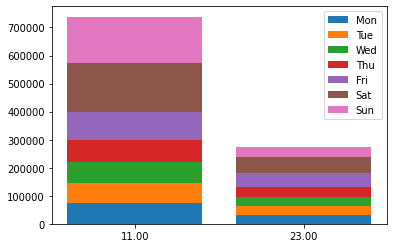

In [76]:
width = 0.35 
plt.bar(inti,mon, label='Mon')
plt.bar(inti,tue,bottom=mon,label='Tue')
plt.bar(inti,wed,bottom= one ,label='Wed')
plt.bar(inti,thu,bottom= two,label='Thu')
plt.bar(inti,fri,bottom= three,label='Fri')
plt.bar(inti,sat,bottom= four,label='Sat')
plt.bar(inti,sun,bottom= five,label='Sun')
plt.legend()